In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [7]:
df = pd.read_csv('C:/Users/ajean/Documents/proyecto-data-science/DATASETS/casos_covid_provincia.csv', sep=';', decimal=',')

In [8]:
df.head()

,fecha,provincia,num_casos,num_casos_prueba_pcr,num_casos_prueba_test_ac,num_casos_prueba_ag,num_casos_prueba_elisa,num_casos_prueba_desconocida
0,01/01/2020,Alicante,0,0,0,0,0,0
1,01/01/2020,Albacete,0,0,0,0,0,0
2,01/01/2020,Almeria,0,0,0,0,0,0
3,01/01/2020,Avila,0,0,0,0,0,0
4,01/01/2020,Barcelona,0,0,0,0,0,0


In [9]:
df.columns

Index(['fecha', 'provincia', 'num_casos', 'num_casos_prueba_pcr',
       'num_casos_prueba_test_ac', 'num_casos_prueba_ag',
       'num_casos_prueba_elisa', 'num_casos_prueba_desconocida'],
      dtype='object')

In [10]:
df.fecha=pd.to_datetime(df.fecha, format="%d/%m/%Y")

In [11]:
df.head()

,fecha,provincia,num_casos,num_casos_prueba_pcr,num_casos_prueba_test_ac,num_casos_prueba_ag,num_casos_prueba_elisa,num_casos_prueba_desconocida
0,2020-01-01,Alicante,0,0,0,0,0,0
1,2020-01-01,Albacete,0,0,0,0,0,0
2,2020-01-01,Almeria,0,0,0,0,0,0
3,2020-01-01,Avila,0,0,0,0,0,0
4,2020-01-01,Barcelona,0,0,0,0,0,0


In [12]:
barcelona_df = df[df["provincia"] == "Barcelona"]
barcelona_df.head()

,fecha,provincia,num_casos,num_casos_prueba_pcr,num_casos_prueba_test_ac,num_casos_prueba_ag,num_casos_prueba_elisa,num_casos_prueba_desconocida
4,2020-01-01,Barcelona,0,0,0,0,0,0
57,2020-01-02,Barcelona,0,0,0,0,0,0
110,2020-01-03,Barcelona,0,0,0,0,0,0
163,2020-01-04,Barcelona,0,0,0,0,0,0
216,2020-01-05,Barcelona,0,0,0,0,0,0


In [13]:
barcelona_df.columns

Index(['fecha', 'provincia', 'num_casos', 'num_casos_prueba_pcr',
       'num_casos_prueba_test_ac', 'num_casos_prueba_ag',
       'num_casos_prueba_elisa', 'num_casos_prueba_desconocida'],
      dtype='object')

In [14]:
barcelona_df2 = barcelona_df.set_index('fecha').resample('W')[['num_casos']].sum()

In [15]:
barcelona_df2.head()

,num_casos
fecha,
2020-01-05,0
2020-01-12,1
2020-01-19,0
2020-01-26,0
2020-02-02,7


<AxesSubplot:xlabel='fecha'>

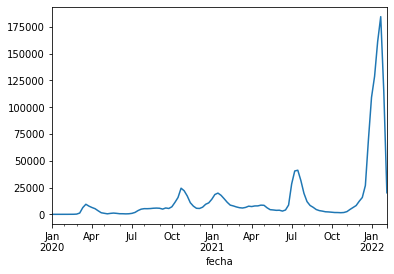

In [16]:
barcelona_df2['num_casos'].plot()

In [17]:
# create timeseries readable by fbprophet
ts = pd.DataFrame({'ds':barcelona_df2.index,'y':barcelona_df2.num_casos})
#ts['cap'] = 30000 # unused in linear growth
#ts['floor'] = 0 # unused in linear growth
ts.head()

,ds,y
fecha,,
2020-01-05,2020-01-05,0
2020-01-12,2020-01-12,1
2020-01-19,2020-01-19,0
2020-01-26,2020-01-26,0
2020-02-02,2020-02-02,7


In [18]:
from fbprophet import Prophet
from fbprophet.plot import add_changepoints_to_plot
# instantiate the model and fit the timeseries
prophet = Prophet(changepoint_range=0.5,changepoint_prior_scale=0.5)
prophet.fit(ts)

# create a future data frame 
future = prophet.make_future_dataframe(periods=30, freq='W') #documentación para ver cómo poner semanas
forecast = prophet.predict(future)

# display the most critical output columns from the forecast
forecast[['ds','yhat','yhat_lower','yhat_upper']].head()

# plot
fig = prophet.plot(forecast)
a = add_changepoints_to_plot(fig.gca(),prophet,forecast)
#fig

ModuleNotFoundError: No module named 'fbprophet'

In [ ]:
forecast[['ds','yhat','yhat_lower','yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,2020-01-05,-4373.436076,-21341.929607,12292.158910
1,2020-01-12,17607.507432,1820.350432,33771.540622
2,2020-01-19,22874.998319,6750.954959,38166.727727
3,2020-01-26,11431.544755,-4748.968795,28000.138552
4,2020-02-02,-5586.915722,-21443.355915,11926.478663


In [ ]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
135,2022-08-07,106295.013045,44596.891258,136425.045866,57463.316895,147492.728073,-13361.163523,-13361.163523,-13361.163523,-13361.163523,-13361.163523,-13361.163523,0.0,0.0,0.0,92933.849522
136,2022-08-14,107904.272676,37495.752125,136114.305178,57186.688376,151915.015858,-17077.433234,-17077.433234,-17077.433234,-17077.433234,-17077.433234,-17077.433234,0.0,0.0,0.0,90826.839442
137,2022-08-21,109513.532308,35561.900301,136643.456760,55906.440484,155861.717822,-18598.080573,-18598.080573,-18598.080573,-18598.080573,-18598.080573,-18598.080573,0.0,0.0,0.0,90915.451735
138,2022-08-28,111122.791939,33308.040197,140839.342988,54484.884489,160721.597587,-20826.107353,-20826.107353,-20826.107353,-20826.107353,-20826.107353,-20826.107353,0.0,0.0,0.0,90296.684586
139,2022-09-04,112732.051571,25361.344350,142140.727284,53586.312311,165469.632824,-24459.224903,-24459.224903,-24459.224903,-24459.224903,-24459.224903,-24459.224903,0.0,0.0,0.0,88272.826668


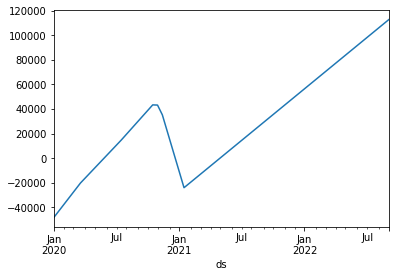

In [ ]:
forecast.set_index('ds')['trend'].plot()

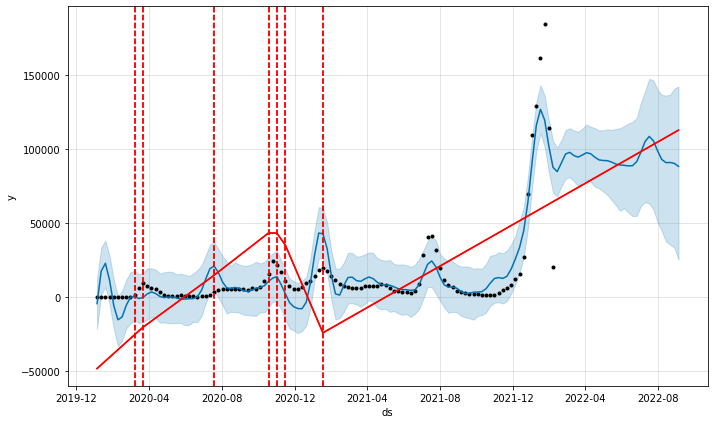

In [ ]:
from fbprophet.plot import add_changepoints_to_plot
a = add_changepoints_to_plot(fig.gca(),prophet,forecast)
fig

In [ ]:
# Guardamos el resultado en un fichero csv separado por comas. 
forecast.to_csv('covid_barcelona.csv',  index=False, sep=";", decimal=",")

In [ ]:
# Guardamos el resultado en un fichero csv separado por comas. 
barcelona_df2.to_csv('covid_barcelona1.csv',  index=False, sep=",", decimal=",")